## 1. Exploratory Data Analysis

In this notebook, exploratory data analysis will be introduced on the dataset.

From "fraud_detection" package, the module eda will be imported. Before going through EDA, there are multiple steps need to be taken for preprocessing the dataset consists of creating, extracting, cleaning and transforming the data.

The data analysis aims to provide some useful insights from the dataset and relationships among the variables. This is a crucial part of data science project. It provides the necessary insights and understanding on dataset which we will be used for future steps such as feature engineering, model development and evaluation.

Finally after some analysis, the dataset is prepared based on the most important features and necessary transformations to be able to use for machine learning model developments.

In [58]:
import os
import sys
module_path = os.path.abspath(os.path.join('.'))
print(module_path)

D:\Projects\Fraud Detection


In [59]:
# importing necessary modules form "fraud_detection" package
from fraud_detection.main import preprocessing
pp = preprocessing()

# import necessary libraries
import numpy as np
import pandas as pd

# notebook settings
import warnings
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None
pd.set_option('display.max_rows', None)
pd.set_option("display.max_columns", None)
%matplotlib inline

#### 1.A Preprocessing

First the data will be loading via the main module and preprocessing class.

In [60]:
# loading the JSON format of dataset into a Pandas Dataframe
df =  pp.loading_dataset('transactions.txt')
df[:5]

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,,0.0,,,,False,,,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,True,,,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,False,,,False,False
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,False,,,False,False
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,,0.0,,,,True,,,False,False


The empty characters will be replaced by NaN.

In [61]:
df = df.replace('', np.nan)

The "transactionDateTime" column is extracted into two seperate columns of "transactionDate" and "transactionTime" for future analysis. They are also added into the original dataset.

There are unnecessary columns: 'accountNumber', 'echoBuffer', 'merchantCity', 'merchantState', 'merchantZip', 'posOnPremises', 'recurringAuthInd' are deleted since they have no value for our analysis.

Finally, a column "index" created to hold the number of records.

In [62]:
df['transactionTime'] = df['transactionDateTime'].apply(pd.Timestamp).dt.time
df['transactionDate'] = df['transactionDateTime'].apply(pd.Timestamp).dt.date
df = df.drop(['accountNumber', 'echoBuffer', 'merchantCity', 'merchantState', 'merchantZip', 
              'posOnPremises', 'recurringAuthInd'], axis = 1)
df.reset_index(inplace=True)
df[:5]

,index,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,transactionTime,transactionDate
0,0,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.0,False,False,False,14:27:32,2016-08-13
1,1,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,True,False,False,05:05:54,2016-10-11
2,2,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False,09:18:39,2016-11-08
3,3,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False,02:14:50,2016-12-10
4,4,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.0,True,False,False,21:04:46,2016-03-24


In [63]:
pp.pickle_save(df, fname='dfPickle_1')

In [64]:
df = pp.pickle_load(fname='dfPickle_1')

#### 1.B Descriptive Statistics

Understanding the number of fraudulant transactions vs non-fraudulant and its ratio.

In [65]:
Fraud_len = len(df[df['isFraud'] == True])
NonFraud_len = len(df[df['isFraud'] == False])
print('Number of non-Fraud {} vs Fraud {} transactions'.format(NonFraud_len, Fraud_len))

Number of non-Fraud 773946 vs Fraud 12417 transactions


In [66]:
print(f'Ratio of Fraud to non-Fraud transactions: {Fraud_len/NonFraud_len}')

Ratio of Fraud to non-Fraud transactions: 0.016043754990658264


**Data Types**

It is important to define the data types correctly, whether continuous or categorical. Ratio or interval and so on. Also later each data type will be transformed and scaled to get proper values. The optimization step will be taken to convert to proper Pandas data types to take up minimum memory size to hold the data set. This optimization increases the machine learning algorithms performance and reduces time to process the dataset.

**Unique values**

To understand the dataset better, next we write a function to return the unique values for each variable. This give a sense of each numerical or categorical variables whether there are limited few unique values each variable has or there are several or unlimited unique variables. For the few unique values, the function will print them next to each variable.


In [67]:
print ("Data Shape:", df.shape, "\n")
print ("Data Dtypes:\n", df.dtypes, "\n")
print ("Missing Values:\n", df.isnull().sum(), "\n")
for var in df:
    if len(df[var].unique()) < 100:
        print (df[var].unique().shape[0], "unique Values of", var, df[var].unique(), "\n")
    else:
        print (df[var].unique().shape[0], "unique Values of", var)

Data Shape: (786363, 25) 

Data Dtypes:
 index                         int64
customerId                    int64
creditLimit                   int64
availableMoney              float64
transactionDateTime          object
transactionAmount           float64
merchantName                 object
acqCountry                   object
merchantCountryCode          object
posEntryMode                 object
posConditionCode             object
merchantCategoryCode         object
currentExpDate               object
accountOpenDate              object
dateOfLastAddressChange      object
cardCVV                       int64
enteredCVV                    int64
cardLast4Digits               int64
transactionType              object
currentBalance              float64
cardPresent                    bool
expirationDateKeyInMatch       bool
isFraud                        bool
transactionTime              object
transactionDate              object
dtype: object 

Missing Values:
 index                     

In [68]:
continous_cols = ['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']
categorical_cols = ['customerId', 'merchantName', 'acqCountry', 'merchantCountryCode', 'posConditionCode',
           'merchantCategoryCode', 'posEntryMode', 'transactionType', 'cardPresent', 'expirationDateKeyInMatch', 'isFraud']

#### 1.C Visualizations

In [69]:
from fraud_detection.eda import eda
from fraud_detection.eda.visualization import visualization
from fraud_detection.eda.computations import computations
from fraud_detection.main import preprocessing
import numpy as np
import pandas as pd

viz = visualization()
cmp = computations()
pp = preprocessing()

df = pp.pickle_load(fname='dfPickle_1')

Count Plot of the "Fraud" transactions versus "Legitimate" transactions

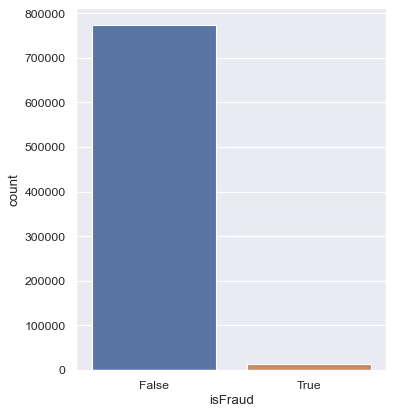

In [70]:
viz.count_plot(df, col='isFraud', figsize=(5,6))

The matrix of **scatter plot** shows scatter plots for each pair of features. This is useful to understand if there is any relationship or correlations between pair of features. Based on the continuous features, it seems there are correlations between transactionAmount-currentBalance, creditLimit-currentBalance, cardCVV_enteredCVV

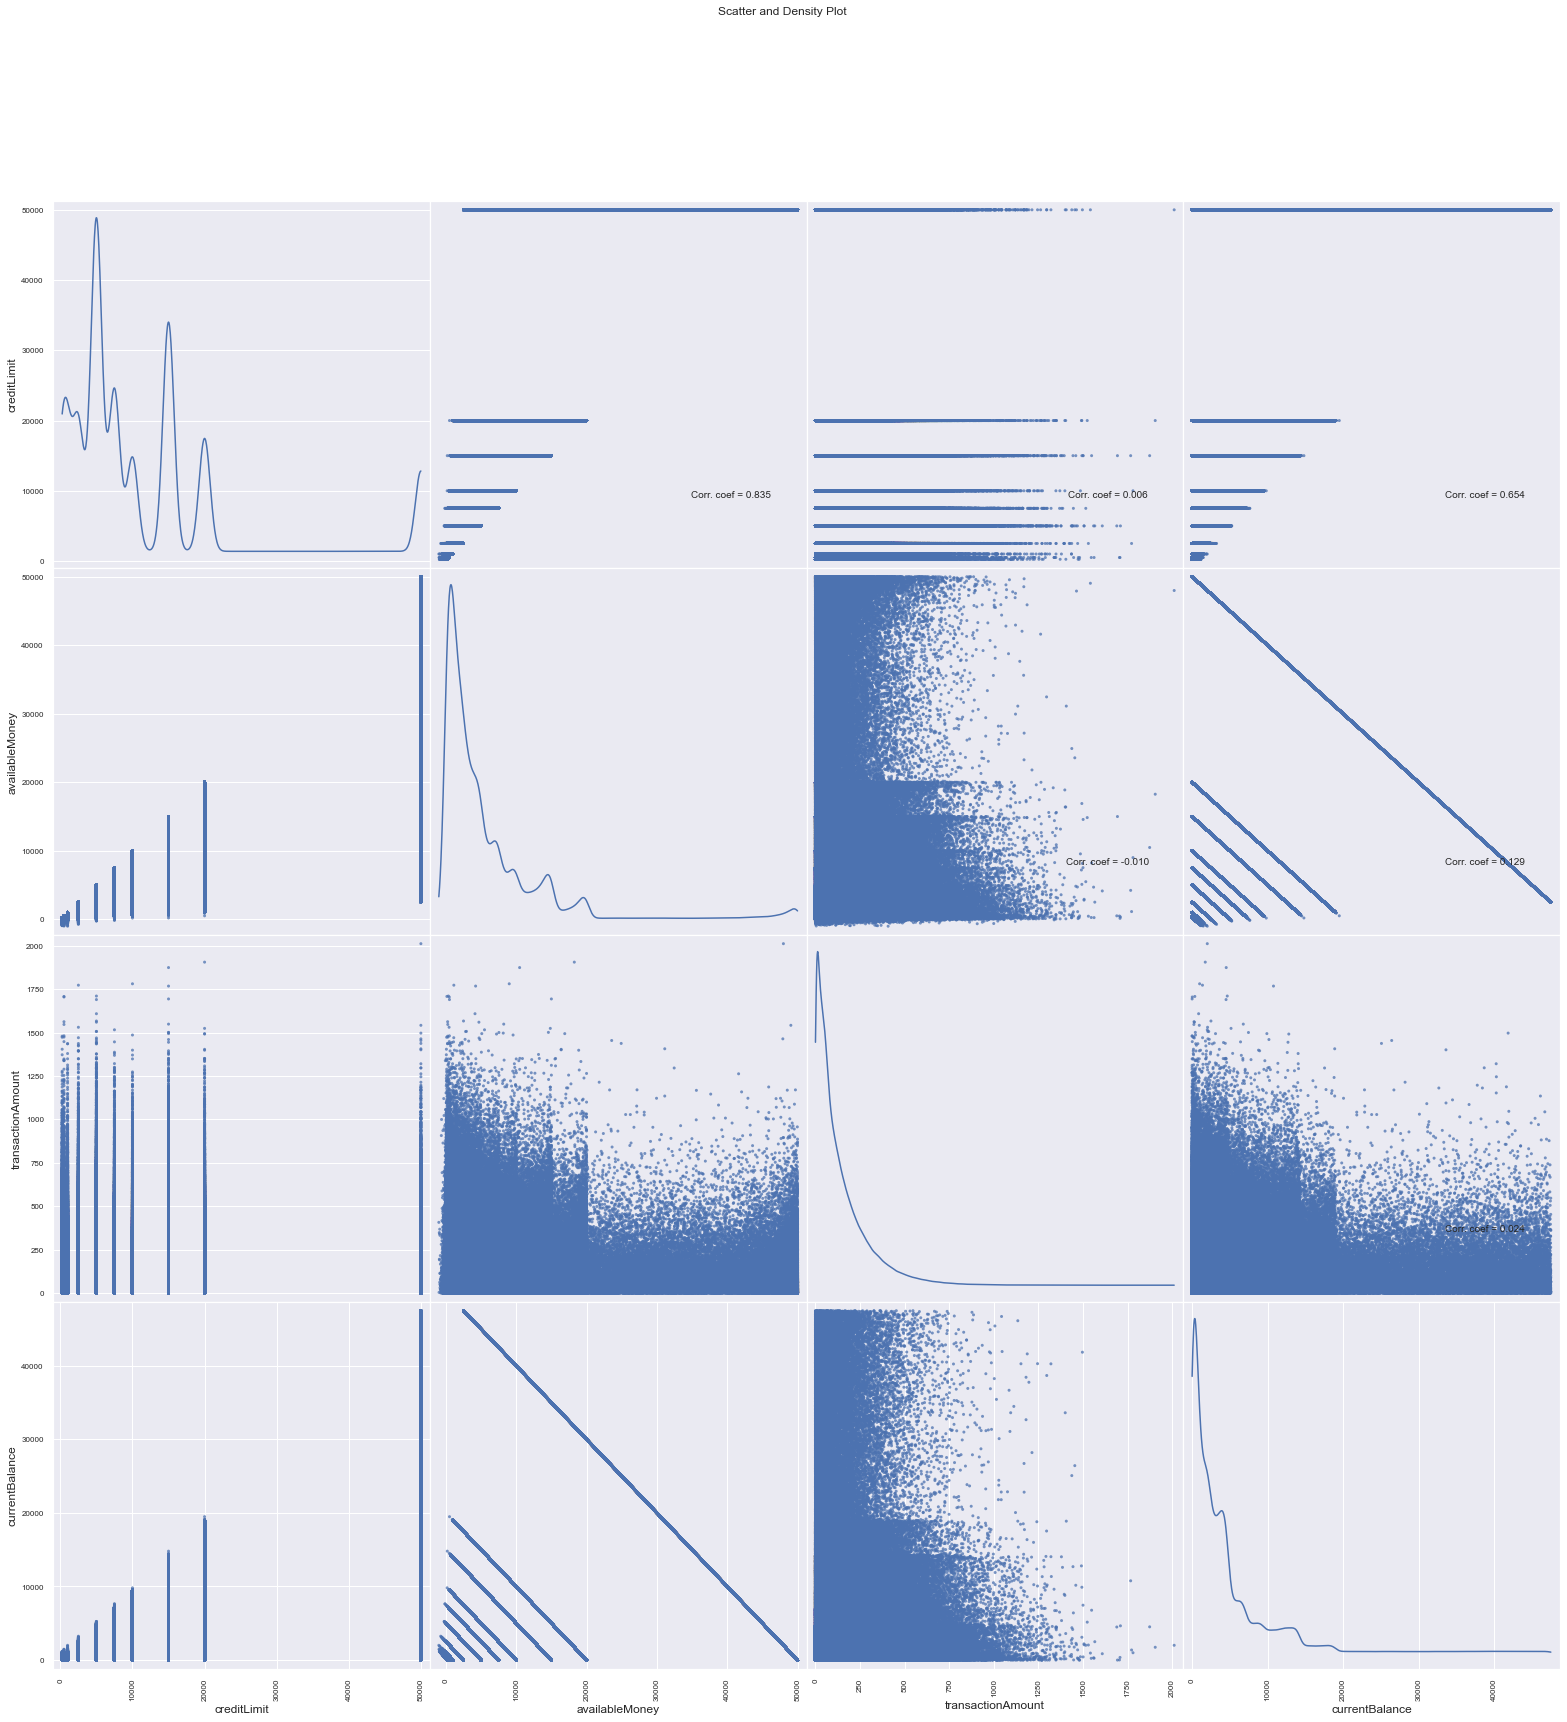

In [71]:
viz.plotScatterMatrix(df[continous_cols], 27, 10)

Another useful analysis is **normality check**. We will see in the regression analysis section that normality check is one of the main assumptions of linear regression. However, in logistic regression analysis normality is not an assumption.
SInce the data is being used for different models, we can check the normality for continuous variables and make necessary transformations if needed.

There are two useful transformations “log transformation” and “Boxcox transformation” which can be applied to a non-normally distributed variable.
In the next notebook cells we plot the variable along with other two transformations (log and Boxcox) using q-q plot. A q-q plot is a plot of the quantiles of the first data set against the quantiles of the second data set. By a quantile, we mean the fraction (or percent) of points below the given value. That is, the 0.3 (or 30%) quantile is the point at which 30% percent of the data fall below and 70% fall above that value.

**Note** that, before using boxcox transformation, a function was written “boxcox_prep” to shift the data above value of zero to make it possible for the boxcox transformation.


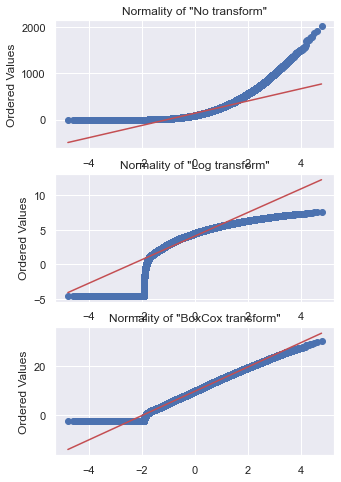

In [72]:
col = cmp.boxcox_prep(df['transactionAmount'])
viz.res_plot(col)

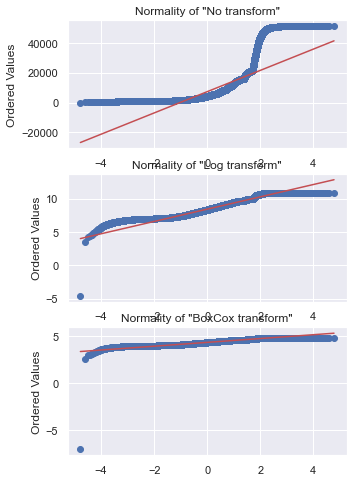

In [73]:
col = cmp.boxcox_prep(df['availableMoney'])
viz.res_plot(col)

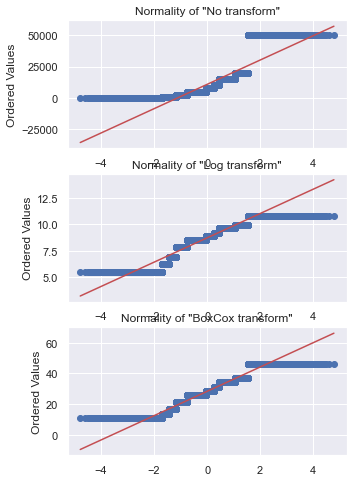

In [74]:
viz.res_plot(df['creditLimit'])

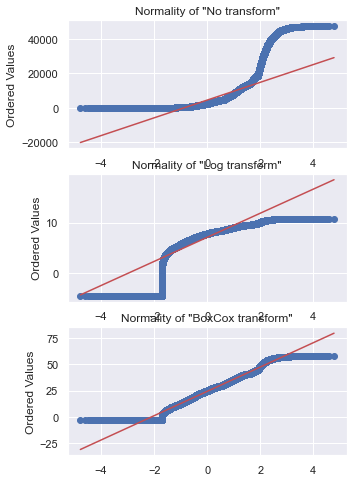

In [75]:
col = cmp.boxcox_prep(df['currentBalance'])
viz.res_plot(col)

Another useful visualization is using **histogram plot** to show the distributions of continuous variables. This also gives the idea of modality of distributions. For example the “transactionAmount” is a unimodal, “creditLimit”, “availableMoney” are multimodal distributions.

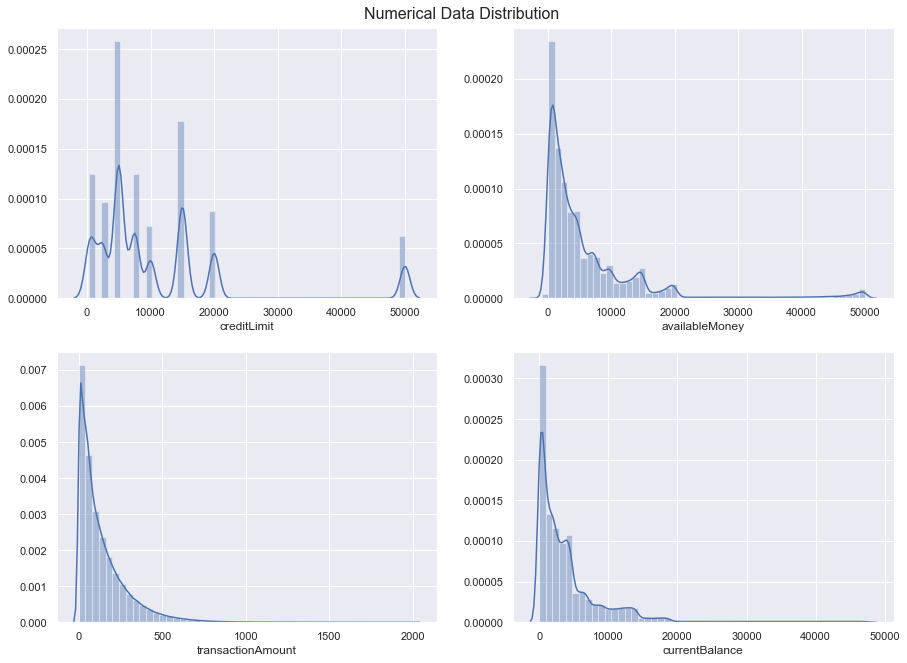

In [76]:
# viz.multi_dist_plot(df[continous_cols[:3]])

import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

counter = 0

for i in range(2):
    for j in range(2):
        sns.distplot(df[continous_cols[counter]], ax=ax[i][j])#, color=colors[counter])
        ax[i][j].set_xlabel(continous_cols[counter], fontsize=12)
        ax[i][j].set_ylabel('')
        counter+=1

fig.suptitle('Numerical Data Distribution', fontsize=16)
fig.subplots_adjust(top=0.95)

**Boxplot diagram** is another useful visualization. Like histogram, boxplots show the distribution, standard deviation (variance), and mean of variables. They also show the interquartiles and the outliers of data.

In the below diagram, boxplot for each variable based on the “isFraud” are shown. This can show some clues whether the “isFraud” can impact on the distributions of variables.


IndexError: index 2 is out of bounds for axis 0 with size 2

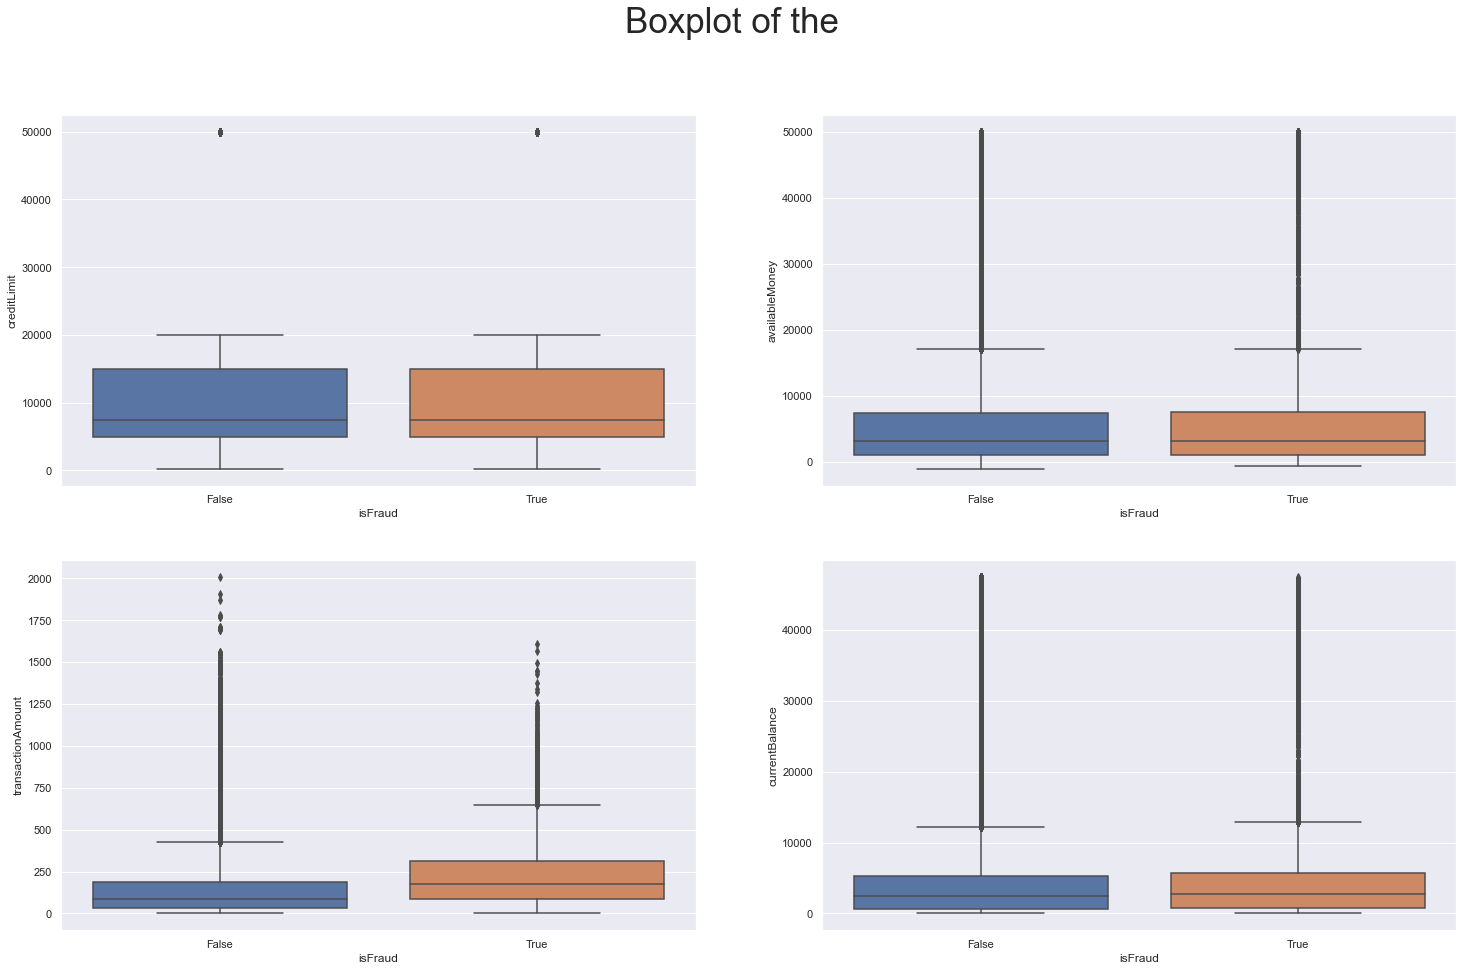

In [77]:
# viz.all_boxplot(df[continous_cols], col_class = 'isFraud')
import matplotlib.pyplot as plt
import seaborn as sns
col_class = 'isFraud'
nrows = 2
ncols = 2
#visualizing the features w high negative correlation
f, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25,15))

f.suptitle('Boxplot of the ', size=35)
for i, feature in enumerate(continous_cols):
    row = i//ncols
    col = i%ncols
#     print('{}, {}'.format(row, col))
    sns.boxplot(x=col_class, y=feature, data=df, ax=axes[row,col])

f.delaxes(axes[2,1])
f.delaxes(axes[2,2])


##### Closer look into 'transactionType'

In [78]:
df['transactionType'].unique()

array(['PURCHASE', 'ADDRESS_VERIFICATION', 'REVERSAL', nan], dtype=object)

In [79]:
df['transactionType'] = df['transactionType'].dropna()
df['transactionType'].unique()

array(['PURCHASE', 'ADDRESS_VERIFICATION', 'REVERSAL', nan], dtype=object)

In [80]:
df_reversal = df[df['transactionType'] == 'REVERSAL']
df_reversal['transactionAmount'].sum()

2821792.5

## Reversal Transactions

The entire reversal transactions and their pre-transactions are stored in the dataframe "df_reversal"

Then the total amount of the transactions are calculated.

In [ ]:
from tqdm import tqdm

df = df.drop_duplicates()
df_reversal = df[:1]
for idx in tqdm(range(len(df))):
    if df.iloc[[idx]]['transactionType'].values[0] == 'REVERSAL':
        
        if df.iloc[[idx]]['transactionAmount'].values[0] == df.iloc[[idx-1]]['transactionAmount'].values[0]:
#             print('+', end='')
            df_reversal = df_reversal.append(df.iloc[[idx]], ignore_index = True)
            df_reversal = df_reversal.append(df.iloc[[idx-1]], ignore_index = True)
df_reversal = df_reversal[1:]
print('Total amount of the reversal transactions:')
df_reversal['transactionAmount'].sum()

In [ ]:
df_reversal[:100]

## Multi-swipe Transactions
The entire multi-swipe transactions are stored in the dataframe "df_multiswipe"

Then the total amount of the transactions are calculated.

In [ ]:
from tqdm import tqdm

df = df.drop_duplicates()
df_multiswipe = df[:1]
for idx in tqdm(range(len(df)-1)):
    if df.iloc[[idx]]['merchantName'].values[0] == df.iloc[[idx+1]]['merchantName'].values[0]:
        if df.iloc[[idx]]['transactionAmount'].values[0] == df.iloc[[idx+1]]['transactionAmount'].values[0]:
#                 print('+', end='')
                df_multiswipe = df_multiswipe.append(df.iloc[[idx]], ignore_index = True)
    #             df_multiswipe = df_multiswipe.append(df.iloc[[idx-1]], ignore_index = True)
df_multiswipe = df_multiswipe[1:]
print('Total amount of the multi-swipe transactions:')
df_multiswipe['transactionAmount'].sum()

In [ ]:
df_multiswipe = df_multiswipe[1:]
print('Total amount of the multi-swipe transactions:')
df_multiswipe['transactionAmount'].sum()

In [ ]:
df_multiswipe[:100]

##### Closer look into 'transactionAmount'

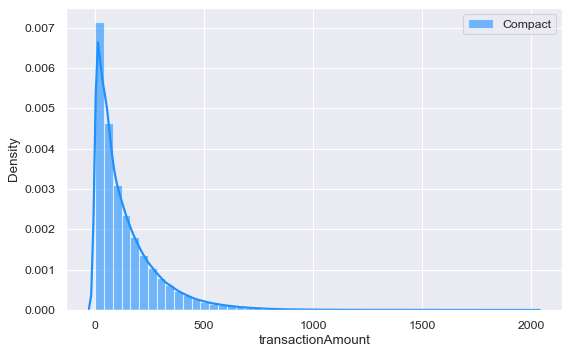

In [81]:
viz.hist_plot(df['transactionAmount'])

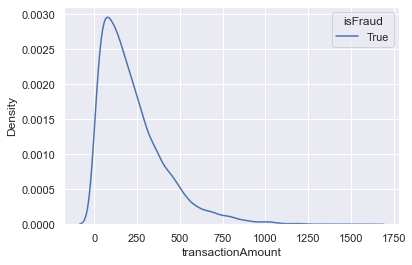

In [82]:
viz.kde_plot(df[df['isFraud'] == True], x='transactionAmount', hue='isFraud')

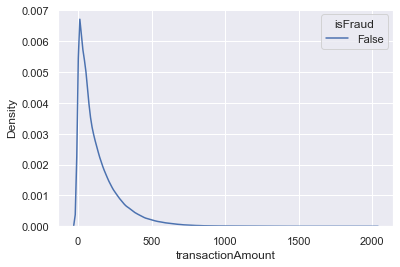

In [83]:
viz.kde_plot(df[df['isFraud'] == False], x='transactionAmount', hue='isFraud')

#### 1.E Queries
**Normalized results for Fraudulent vs non-Fraudulent**

In this section, we make some queries to get more insight on the dataset and its variables. These queries will be based on each variable with respect to the dependent variable (“isFraud”).
Note that, the results are shown based on the percentage for fraud or non-fraud categories. It means that, due to the fact that the amount of fraud transactions are sparse and very few in comparison to the entire dataset, it is hard to show the result as “count”, therefore the results are shown with “percentage” format.

##### CVV_diff
One idea is that the fraudster in his attempt will provide the wrong CVV to make a transaction. However, we know that for any reason the card holder also may make a wrong CVV attempt.
By investigating this idea, a “CVV_diff” column is made as a result of the difference between the “cardCVV” and “enteredCVV”. This column has 0 and 1 values, meaning 1 if there is a difference, 0 if there is no difference.
In this case, there is no meaningful findings.

In [84]:
df['CVV_diff'] = (df['cardCVV'] - df['enteredCVV'])
df["CVV_diff"] = np.where(df['CVV_diff'] == 0, 0, 1)
df[['index', 'CVV_diff']].head()

,index,CVV_diff
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


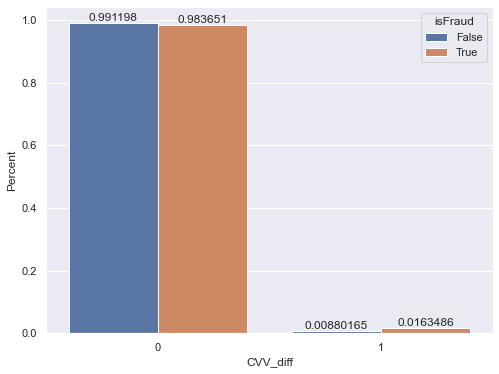

In [85]:
viz.barplot_percnt(df, x='CVV_diff', y='Percent', hue='isFraud', figsize=(8,6))

##### posEntryMode
There are 10 categories in this column. We would see if there is any meaningful differences among the categorie’s distributions with respect to “isFraud”. The plot shows that 05, 09, and 02 are important for non fraudulent transactions. But the order is different for the fraudulent transactions! In this case 09, 02, and 05 are the most important categories.


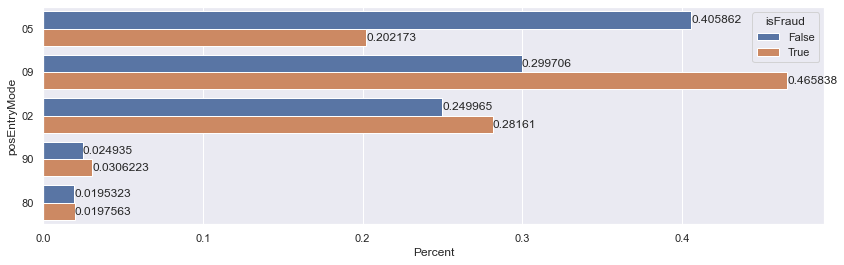

In [86]:
viz.barplot_percnt(df, x='posEntryMode', y='Percent', hue='isFraud', figsize=(14,4), transposed=True)

##### merchantCategoryCode
Another analysis that turns out to be meaningful is merchant category. There are some meaningful differences between the distribution of the major category in fraudulent and non-fraudulent transactions.

It means fraudsters attempt on certain categories in most cases. The online-retail purchases, covers around 40% of the fraudulent transactions!


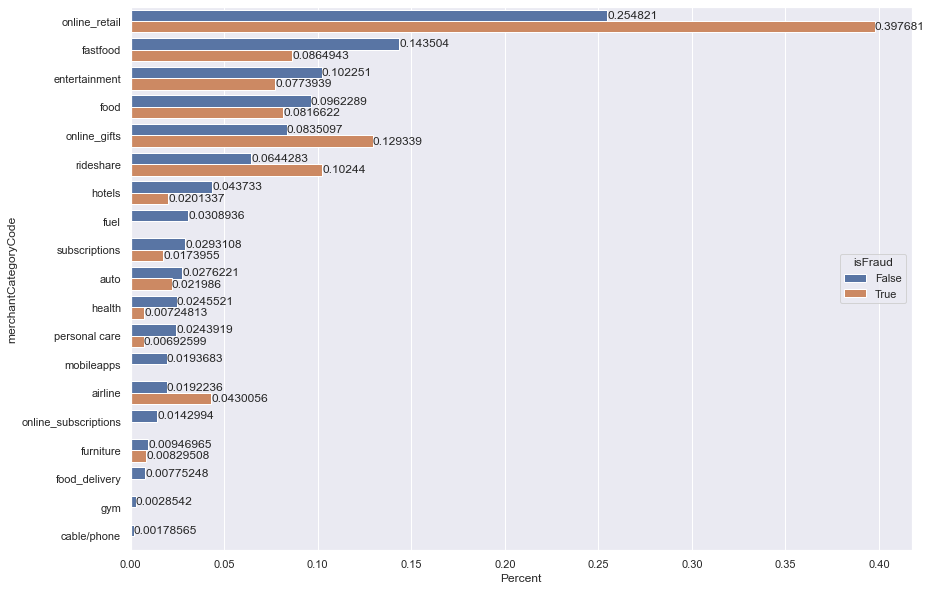

In [87]:
viz.barplot_percnt(df, x='merchantCategoryCode', y='Percent', hue='isFraud', figsize=(14,10), transposed=True)

##### DateTime Difference Analysis (Adding features)
1. currentExpDate (year difference)
Let’s do some analysis on the currentExpDate. By extracting the year and create a difference between them, we don’t see a meaningful findings

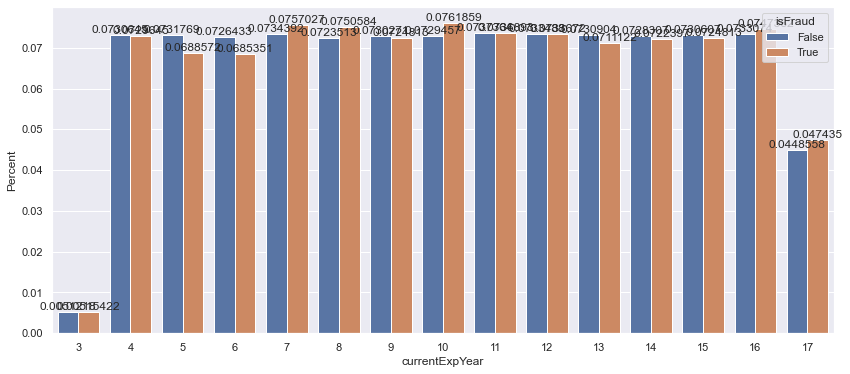

In [88]:
df['currentExpYear'] = pd.DatetimeIndex(df['currentExpDate']).year - pd.DatetimeIndex(df['transactionDate']).year
viz.barplot_percnt(df, x='currentExpYear', y='Percent', hue='isFraud', figsize=(14,6), transposed=False)
df = df.drop(['currentExpYear'], axis=1)

2. accountOpenDate (year difference)

By introducing the "accountOpenYear", this analysis is also shows not a promising meaningful results.

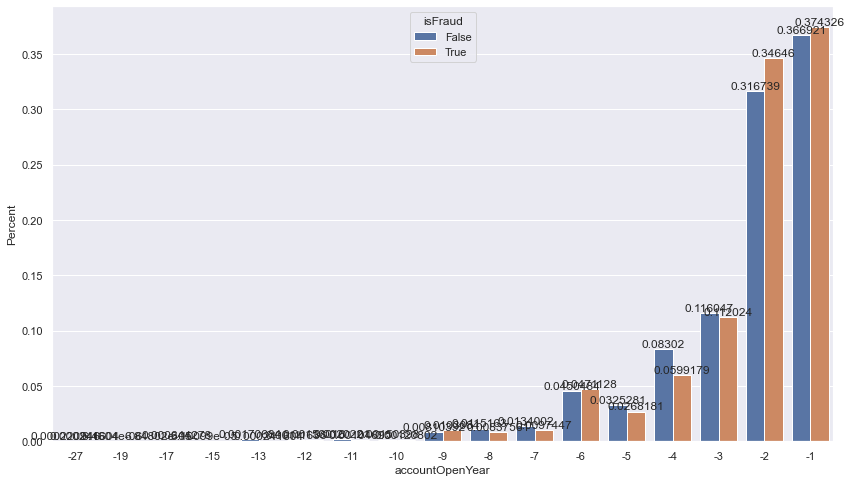

In [89]:
df['accountOpenYear'] = pd.DatetimeIndex(df['accountOpenDate']).year - pd.DatetimeIndex(df['transactionDate']).year
viz.barplot_percnt(df, x='accountOpenYear', y='Percent', hue='isFraud', figsize=(14,8), transposed=False)
df = df.drop(['accountOpenYear'], axis=1)

3. accountOpenDate (month difference, no matter of year difference)

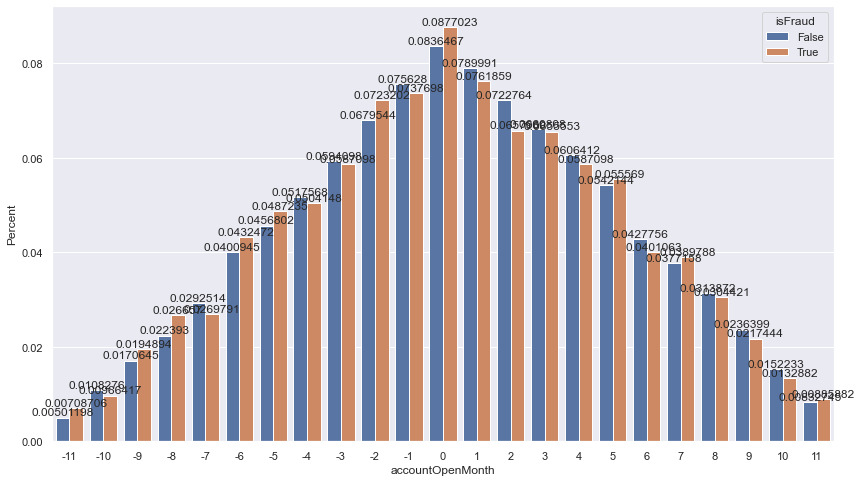

In [90]:
df['accountOpenMonth'] = pd.DatetimeIndex(df['accountOpenDate']).month - pd.DatetimeIndex(df['transactionDate']).month
viz.barplot_percnt(df, x='accountOpenMonth', y='Percent', hue='isFraud', figsize=(14,8), transposed=False)
df = df.drop(['accountOpenMonth'], axis=1)

4. accountOpenDate (month difference in total, with respect year difference)
On the first analysis, by showing the entire difference, it is hard to see the difference in a full diagram.

By plotting the histogram, it is easy to see that the majority of transactions have been made between 0 and 80 months differences.

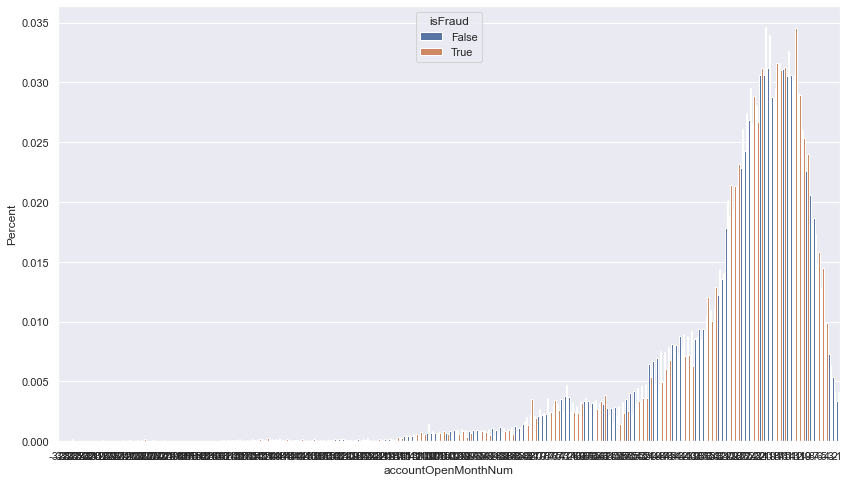

In [91]:
df['accountOpenMonthNum'] = (pd.DatetimeIndex(df['accountOpenDate']).year - \
                             pd.DatetimeIndex(df['transactionDate']).year) * 12 + \
                            (pd.DatetimeIndex(df['accountOpenDate']).month - \
                             pd.DatetimeIndex(df['transactionDate']).month)
viz.barplot_percnt(df, x='accountOpenMonthNum', y='Percent', hue='isFraud', label=False, figsize=(14,8), transposed=False)

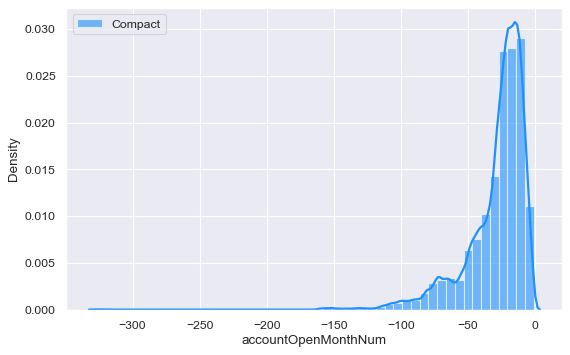

In [92]:
viz.hist_plot(df['accountOpenMonthNum'])

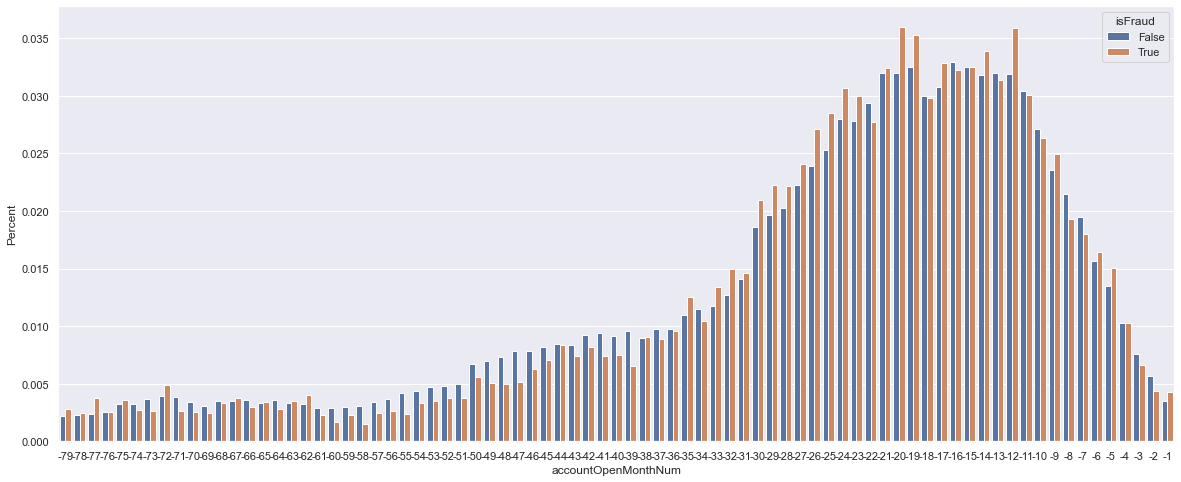

In [93]:
viz.barplot_percnt((df[df['accountOpenMonthNum'] > -80]), 
                     x='accountOpenMonthNum', y='Percent', hue='isFraud', label=False, figsize=(20,8), transposed=False)

Plotting the percentage diagram for transactions between -80 and 0, we can see finally some meaningful results!
The transactions that have differences in month between -39 to -61 have more ratio for non-fraudulent. However the transactions with total month difference between -18 to -30 have more ration for fraudulent transactions. Therefore we keep this feature for further analysis.

5. dateOfLastAddressChangeYear (year difference)
By plotting the year difference, there is no meaningful difference has been found.

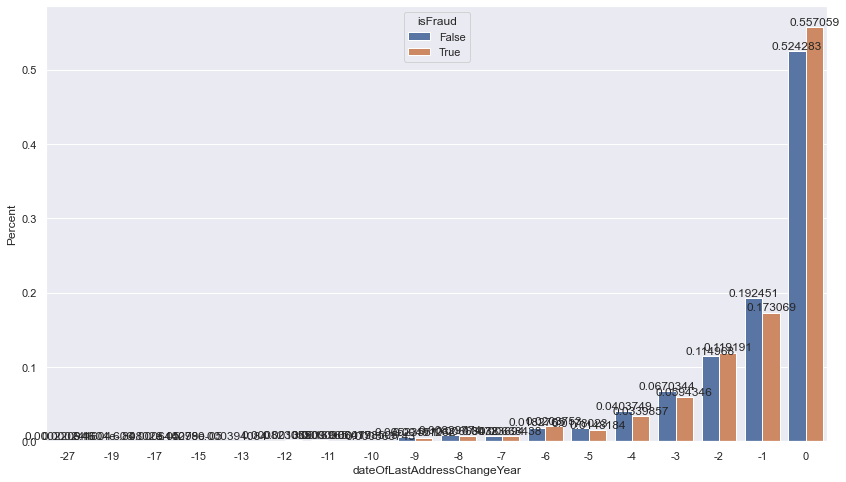

In [94]:
df['dateOfLastAddressChangeYear'] = pd.DatetimeIndex(df['dateOfLastAddressChange']).year - \
                                        pd.DatetimeIndex(df['transactionDate']).year
viz.barplot_percnt(df, x='dateOfLastAddressChangeYear', y='Percent', hue='isFraud', figsize=(14,8), transposed=False)
df = df.drop(['dateOfLastAddressChangeYear'], axis=1)

6. dateOfLastAddressChangeYear (month difference)
By plotting the year difference, there is no meaningful difference has been found.

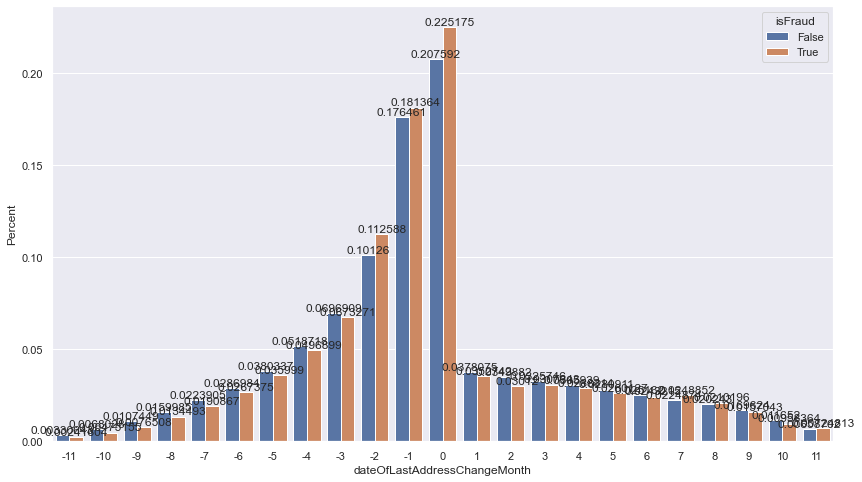

In [95]:
df['dateOfLastAddressChangeMonth'] = pd.DatetimeIndex(df['dateOfLastAddressChange']).month \
                                        - pd.DatetimeIndex(df['transactionDate']).month
viz.barplot_percnt(df, x='dateOfLastAddressChangeMonth', y='Percent', hue='isFraud', figsize=(14,8), transposed=False)
df = df.drop(['dateOfLastAddressChangeMonth'], axis=1)

##### transactionType
By normalized plotting the feature based on “isFraud”, there is no meaningful difference has been found.

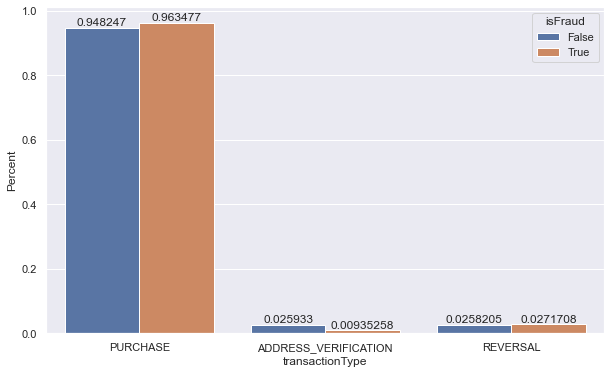

In [96]:
viz.barplot_percnt(df, x='transactionType', y='Percent', hue='isFraud', figsize=(10,6), transposed=False)

##### cardPresent
There is fraction of differences for this feature with respect to “isFraud”.

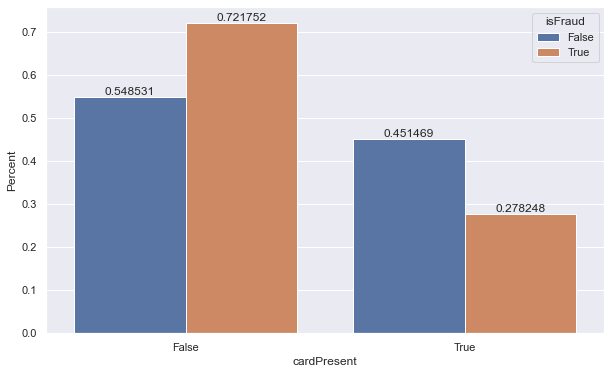

In [97]:
viz.barplot_percnt(df, x='cardPresent', y='Percent', hue='isFraud', figsize=(10, 6), transposed=False)

### 1.D Feature Engineering

**Boxcox transformations**

From the 1.B section and analysis on the normality check, here we replace the continous columns with the boxcox amount

In [98]:
from scipy.stats import boxcox
df['transactionAmount'], lam = boxcox(cmp.boxcox_prep(df['transactionAmount']))
df['creditLimit'], _ = boxcox(df['creditLimit'])
df['availableMoney'], _ = boxcox(cmp.boxcox_prep(df['availableMoney']))
df['currentBalance'], _ = boxcox(cmp.boxcox_prep(df['currentBalance']))

In [99]:
cols = ['cardCVV', 'enteredCVV', 'transactionDateTime', 'transactionTime', 'transactionDate',
             'accountOpenDate', 'currentExpDate', 'dateOfLastAddressChange', 'cardLast4Digits', 'CVV_diff']
for col in cols:
    try:
        df = df.drop(col, axis=1)
    except:
        print(col, 'cannot be dropped')
df.columns

Index(['index', 'customerId', 'creditLimit', 'availableMoney',
       'transactionAmount', 'merchantName', 'acqCountry',
       'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'transactionType', 'currentBalance',
       'cardPresent', 'expirationDateKeyInMatch', 'isFraud',
       'accountOpenMonthNum'],
      dtype='object')

**Scaling**

In [100]:
df_sc = cmp.min_max_scalar(df, continous_cols)
df_sc.head()

,index,customerId,creditLimit,availableMoney,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,accountOpenMonthNum
0,0,737265056,0.419384,0.967996,0.381501,Uber,US,US,02,01,rideshare,PURCHASE,0.0,False,False,False,-17
1,1,737265056,0.419384,0.967996,0.348129,AMC #191138,US,US,09,01,entertainment,PURCHASE,0.0,True,False,False,-19
2,2,737265056,0.419384,0.967996,0.159652,Play Store,US,US,09,01,mobileapps,PURCHASE,0.0,False,False,False,-20
3,3,737265056,0.419384,0.967996,0.159652,Play Store,US,US,09,01,mobileapps,PURCHASE,0.0,False,False,False,-21
4,4,830329091,0.419384,0.967996,0.342940,Tim Hortons #947751,US,US,02,01,fastfood,PURCHASE,0.0,True,False,False,-7


In [101]:
from fraud_detection.eda.computations import MultiColumnLabelEncoder

LE = MultiColumnLabelEncoder(columns=categorical_cols)
df_sc_tr = LE.fit_transform(df_sc)
df_sc_tr.head()

,index,customerId,creditLimit,availableMoney,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,accountOpenMonthNum
0,0,3554,0.419384,0.967996,0.381501,2086,3,3,0,0,17,1,0.0,0,0,0,-17
1,1,3554,0.419384,0.967996,0.348129,27,3,3,2,0,3,1,0.0,1,0,0,-19
2,2,3554,0.419384,0.967996,0.159652,1305,3,3,2,0,12,1,0.0,0,0,0,-20
3,3,3554,0.419384,0.967996,0.159652,1305,3,3,2,0,12,1,0.0,0,0,0,-21
4,4,4082,0.419384,0.967996,0.342940,2084,3,3,0,0,4,1,0.0,1,0,0,-7


**Resampling**

There are various method for resampling the dataset in case of dealing with **imbalance** data. In our work we face with a very high imbalance dataset. There are two main approaches **Over-sampling** and **Under-sampling**.

In over-sampling, there are popular methods such as **SMOTE** and **ADASYN** which can enhance our predictive model performance. They can be applied in future works.

In under-sampling, there are also many different approaches such as **Random undersampling, Tomek, KNN, ...**, In this work, a random undersampling method is used to reduce the sample of Non-Fraud class. This makes the number of Non-Fraud class the same as Fraud class.

![SNOWFALL](img/train_set.jpg)

In [110]:
from sklearn.model_selection import train_test_split

df = df_sc_tr.copy()

# define columns and target column
col_names = df.columns.tolist()
df = df[[c for c in col_names if c not in ['merchantCountryCode', 'availableMoney', 'acqCountry',
                                            'transactionType', 'currentBalance', 'merchantCategoryCode']]]
columns = df.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ['isFraud']]
target = 'isFraud'

# Split into 70% and 30%
random_state = np.random.RandomState(22)
x_train, x_test, y_train, y_test = train_test_split(df[columns], df[[target]],
                                                 test_size = 0.3, random_state = random_state)



print('Length dataset:', len(df))
print('Length test set:', len(y_test))
print('Length training set before undersampling:', len(y_train))

# Undersampling the training set
n = len(y_train[y_train['isFraud']==0])-len(y_train[y_train['isFraud']==1])
print('Length of non-fraud samples - fraud samples (n):', n)
d2 = y_train[y_train['isFraud'] == 0].sample(n=n, random_state=22)
x_train = x_train.drop(d2.index)
y_train = y_train.drop(d2.index)
print('Length training set after undersampling:', len(y_train))
print('new # of frauds in train:', len(y_train[y_train['isFraud']==1]))
print('new # of non-frauds in train:', len(y_train[y_train['isFraud']==0]))

pp.pickle_save(df, fname='dfPickle_2')
pp.pickle_save((x_train, y_train), fname='dfPickle_2_train')
pp.pickle_save((x_test, y_test), fname='dfPickle_2_test')

Length dataset: 786363
Length test set: 235909
Length training set before undersampling: 550454
Length of non-fraud samples - fraud samples (n): 533108
Length training set after undersampling: 17346
new # of frauds in train: 8673
new # of non-frauds in train: 8673


In [107]:
len(df[df['isFraud']==1])

12417

#### 1.F Memory Optimization
The “reduce_mem_usage” function, aims to detect each column’s values and reduce the amount of memory for each of them by assigning appropriate type and reducing the unnecessary occupied memory.


In [103]:
df_sc_tr.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   index                     786363 non-null  int64  
 1   customerId                786363 non-null  int64  
 2   creditLimit               786363 non-null  float64
 3   availableMoney            786363 non-null  float64
 4   transactionAmount         786363 non-null  float64
 5   merchantName              786363 non-null  int32  
 6   acqCountry                786363 non-null  int32  
 7   merchantCountryCode       786363 non-null  int32  
 8   posEntryMode              786363 non-null  int32  
 9   posConditionCode          786363 non-null  int32  
 10  merchantCategoryCode      786363 non-null  int32  
 11  transactionType           786363 non-null  int32  
 12  currentBalance            786363 non-null  float64
 13  cardPresent               786363 non-null  i

In [104]:
df_sc_tr_opt = cmp.reduce_mem_usage(df)

Memory usage of dataframe is 57.00 MB
Memory usage after optimization is: 27.75 MB
Decreased by 51.3%


In [105]:
df_sc_tr_opt.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   index                     786363 non-null  int64   
 1   customerId                786363 non-null  int64   
 2   creditLimit               786363 non-null  float16 
 3   transactionAmount         786363 non-null  float16 
 4   merchantName              786363 non-null  int32   
 5   posEntryMode              786363 non-null  category
 6   posConditionCode          786363 non-null  category
 7   cardPresent               786363 non-null  category
 8   expirationDateKeyInMatch  786363 non-null  category
 9   isFraud                   786363 non-null  category
 10  accountOpenMonthNum       786363 non-null  int64   
dtypes: category(5), float16(2), int32(1), int64(3)
memory usage: 27.7 MB
